# Forecast coal consumption

- Time series AUTO Arima for forecasting

- Time series as regression of lag values

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Coal Consumption.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          132 non-null    object 
 1   Amount         132 non-null    float64
 2   Extract_month  132 non-null    int64  
 3   Extract Year   132 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.2+ KB


In [5]:
df = pd.read_csv("Coal Consumption.csv",
                 parse_dates=['Month'])
# date format is MM - DD - YYYY

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          132 non-null    datetime64[ns]
 1   Amount         132 non-null    float64       
 2   Extract_month  132 non-null    int64         
 3   Extract Year   132 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 KB


In [7]:
df.head()

,Month,Amount,Extract_month,Extract Year
0,1990-01-01,16.50,1,1990
1,1990-02-01,15.17,2,1990
2,1990-03-01,12.75,3,1990
3,1990-04-01,12.31,4,1990
4,1990-05-01,8.34,5,1990


In [8]:
#df['month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)# format='%m-%y')

## Set Columns related to Date / time as index and sort over it

In [9]:
df.set_index('Month', inplace=True)

In [10]:
df.head()

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990


In [11]:
df.loc['1990']

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990
1990-06-01,8.63,6,1990
1990-07-01,12.37,7,1990
1990-08-01,11.53,8,1990
1990-09-01,9.47,9,1990


In [12]:
df.loc['01-01-1990':'03-01-1991'] # mm-dd-yy

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990
1990-06-01,8.63,6,1990
1990-07-01,12.37,7,1990
1990-08-01,11.53,8,1990
1990-09-01,9.47,9,1990


# Check Missing Values

use asfreq function

freq -> MS = start of the month

 QS = start of the quarter

 YS = start of the year

 Y = Year end

 M = Month End

 Q = Quarter End

 D = Daily

 B = Bussiness Days (mon-fri)

 etc

In [13]:
df = df.asfreq("MS") 

In [14]:
df.isna().sum()

Amount           0
Extract_month    0
Extract Year     0
dtype: int64

# Fill Missing values

- Back Fill / bfill

value goes to previous time stamp

Ex. record of 25th is used to fill missing in 24th


- Front fill / pad

value goes to next time stamp

Ex. record of 25th is used to fill missing in 26th

In [15]:
df.fillna(method = "ffill", inplace=True)

# Seasonal decompose

In [18]:
# it gives error if their is null value in data

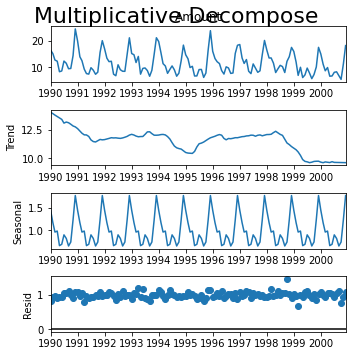

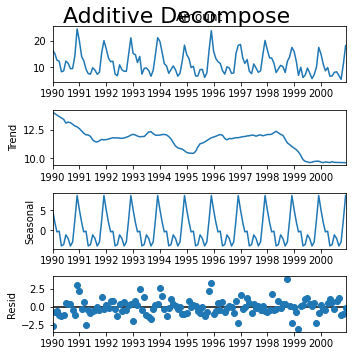

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['Amount'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Amount'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Install PMD Arima Library for Auto Arima

In [17]:
!pip install pmdarima

     ------------------------------------- 613.3/613.3 kB 53.5 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 39.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Split training and test data

How splitting TS data is diff than other problems

In [19]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [20]:
df.shape

(132, 3)

In [21]:
test_size = int(0.1 * df.shape[0])
train, test = train_test_split(df['Amount'],test_size = test_size)

In [22]:
train.shape, test.shape

((119,), (13,))

# Apply AUTO ARIMA

AIC Akaike Information Criterion

Select model which has min AIC

In [23]:
# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12,trace = True) #seasonal =False

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=486.348, Time=2.42 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=675.940, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=506.014, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=567.445, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=937.336, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=559.968, Time=0.81 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=488.640, Time=1.90 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=596.509, Time=0.29 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=495.249, Time=1.46 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=478.097, Time=0.83 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=563.51

In [24]:
# Fit your model
model = pm.auto_arima(train, seasonal=False, m=12,trace = True) #seasonal =False

C:\python3.10\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=937.336, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=638.805, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=813.454, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=636.688, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=627.031, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=627.301, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=634.859, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=627.215, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=597.471, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=595.516, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=616.807, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=597.435, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=601.014, Time

## Make your forecasts

Create ARIMA model based on parameters given by AUTO ARIMA

ARIMA(2,0,0)

In [35]:
model = pm.ARIMA((2,0,0))

In [36]:
model.fit(train)

ARIMA(order=(2, 0, 0))

In [37]:
predictions = model.predict(n_periods = test.shape[0])

In [38]:
test.shape, predictions.shape

((13,), (13,))

In [39]:
mean_absolute_error(test, predictions)

3.708322061038826

In [40]:
pm.metrics.smape(test, predictions)

35.0933494591564

## Seasonal ARIMA

In [42]:
model = pm.ARIMA((1,0,0), seasonal_order= (1,0,1,12), maxiter=100)

In [43]:
model.fit(train)

ARIMA(maxiter=100, order=(1, 0, 0), seasonal_order=(1, 0, 1, 12))

In [44]:
predictions = model.predict(n_periods = test.shape[0])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mean_absolute_error(test, predictions)

1.7043754628254968

In [47]:
pm.metrics.smape(test, predictions)

17.21886984048036

# Evaluate

In [48]:
test

Month
1999-12-01    17.54
2000-01-01    15.04
2000-02-01    11.21
2000-03-01     8.70
2000-04-01     9.92
2000-05-01     6.65
2000-06-01     6.73
2000-07-01     8.12
2000-08-01     8.31
2000-09-01     6.87
2000-10-01     5.45
2000-11-01    11.29
2000-12-01    18.21
Freq: MS, Name: Amount, dtype: float64

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
mean_absolute_error(test, predictions)

1.7043754628254968

In [51]:
mean_squared_error(test, predictions)

3.5831845633838353

In [52]:
pm.metrics.smape(test, predictions)

17.21886984048036

# Time series as Regression of Lag values

## create features from given data

lag values / historical values are features used in time series

In [53]:
df['lag1'] = df['Amount'].shift(1) # t
df['lag2'] = df['Amount'].shift(2) # t-1
df['lag3'] = df['Amount'].shift(3) # t-2
df['lag4'] = df['Amount'].shift(4) # t-3
df['lag5'] = df['Amount'].shift(5) # t-4

In [54]:
df.head(10)

,Amount,Extract_month,Extract Year,lag1,lag2,lag3,lag4,lag5
Month,,,,,,,,
1990-01-01,16.50,1,1990,NaN,NaN,NaN,NaN,NaN
1990-02-01,15.17,2,1990,16.50,NaN,NaN,NaN,NaN
1990-03-01,12.75,3,1990,15.17,16.50,NaN,NaN,NaN
1990-04-01,12.31,4,1990,12.75,15.17,16.50,NaN,NaN
1990-05-01,8.34,5,1990,12.31,12.75,15.17,16.50,NaN
1990-06-01,8.63,6,1990,8.34,12.31,12.75,15.17,16.50
1990-07-01,12.37,7,1990,8.63,8.34,12.31,12.75,15.17
1990-08-01,11.53,8,1990,12.37,8.63,8.34,12.31,12.75
1990-09-01,9.47,9,1990,11.53,12.37,8.63,8.34,12.31


In [55]:
df.dropna(inplace=True)

In [56]:
df.shape

(127, 8)

In [57]:
df.head()

,Amount,Extract_month,Extract Year,lag1,lag2,lag3,lag4,lag5
Month,,,,,,,,
1990-06-01,8.63,6,1990,8.34,12.31,12.75,15.17,16.50
1990-07-01,12.37,7,1990,8.63,8.34,12.31,12.75,15.17
1990-08-01,11.53,8,1990,12.37,8.63,8.34,12.31,12.75
1990-09-01,9.47,9,1990,11.53,12.37,8.63,8.34,12.31
1990-10-01,9.57,10,1990,9.47,11.53,12.37,8.63,8.34


# X & Y split

In [58]:
X = df.loc[:,['lag1','lag2','lag3','lag4','lag5']]
y = df.loc[:,'Amount']

In [59]:
X.shape,y.shape

((127, 5), (127,))

# Train test split

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.1,
                                                 random_state=7)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((114, 5), (13, 5), (114,), (13,))

# LASSO

In [71]:
from sklearn.linear_model import Lasso
la = Lasso(random_state = 7)


In [72]:
la.fit(X_train,y_train)

Lasso(random_state=7)

In [73]:
y_pred1 = la.predict(X_test)

In [74]:
y_pred1.shape,y_test.shape

((13,), (13,))

In [75]:
mean_absolute_error(y_test, y_pred1)

3.1071959886978013

# Elasticnet

In [64]:
from sklearn.linear_model import ElasticNet

In [65]:
en = ElasticNet(random_state=7)

In [66]:
en.fit(X_train,y_train)

ElasticNet(random_state=7)

In [67]:
y_pred = en.predict(X_test)

In [68]:
y_pred.shape,y_test.shape

((13,), (13,))

In [69]:
mean_absolute_error(y_test, y_pred)

3.026912026440241